<a href="https://colab.research.google.com/github/Nazhan99/Tensorflow_notes/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to regression with neural network in tensorflow



In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
##Create data to view and fit

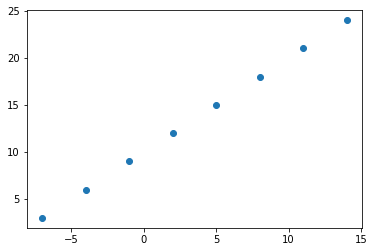

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X= np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X,y)

In [4]:
y== X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

###input and output shapes

In [5]:
#create a demo  tensor for our housing price prediction problem
house_info= tf.constant(["bedroom", 'bathroom', 'garage'])
house_price= tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
#turn numpy array to tensor
X=tf.constant(X)
y=tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape= X[0].shape
output_shape= y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

###Steps in modelling with tensorflow

1. Create a model (define input and output)
2. compiling model (loss function and optimize)
3.  fitting the model (predict the output)

In [11]:
#set random seed
tf.random.set_seed(42)

#1.create a model using the sequential API
model=tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #Stocastic gradient descent
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 902ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 23ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
#try and make a predictioons using our model
y_pred=model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

###improving the model


In [13]:
#lets rebuild our model

#1.create the model
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(1)
])

#2. compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 664ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================]

In [14]:
#try and make a predictioons using our model
y_pred=model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

In [15]:
#create the model (with extra hidden layer)
model= tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

#2. compiling the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 950ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 12ms/step 

In [16]:
model.predict([17.0])

array([[26.58353]], dtype=float32)

###Evaluating the model

In [17]:
#make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
#make label for dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

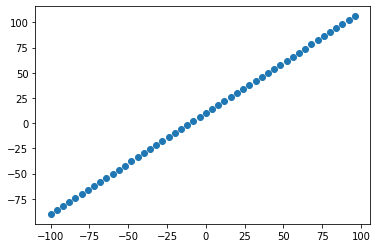

In [19]:
#visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### the 3 sets...
* Training set
* Validation set
* Test set

In [20]:
#check the length the set 
len(X)

50

In [21]:
#Split the data into train set
X_Train =X[:40] #first 40  of the data train set
y_Train=y[:40]

X_Test= X[40:] #last 40 of the data test set  
y_Test=y[40:]

len(X_Train), len(X_Test), len(y_Train), len(y_Test)

(40, 10, 40, 10)

###Visualizing the data

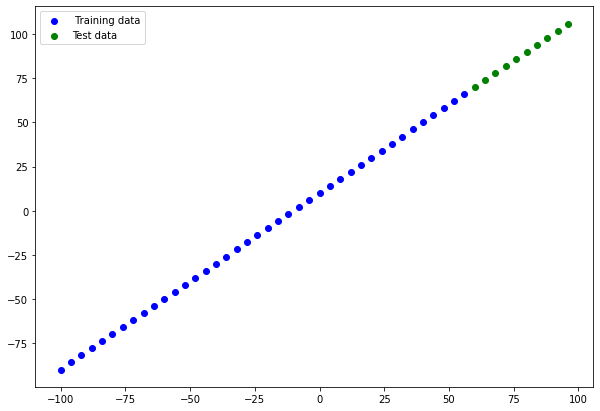

In [22]:
plt.figure(figsize=(10,7))

#plot the training data in blue
plt.scatter(X_Train, y_Train, c="b", label=" Training data")

plt.scatter(X_Test,y_Test, c="g", label="Test data")
plt.legend()

In [23]:
#build neural network model

#1. create a model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

#3. fit the model
#model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

In [24]:
model.summary()

ValueError: ignored

In [25]:
#create a model which automatically build by defining the input_shape argument
tf.random.set_seed(42)

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(10, input_shape=[1]),
                           tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params- total numebr of parameters in the model
*Trainable parameters- these are the parameters/pattern the model can update as it trains.
* Non-Trainable params- parameters that aren't updated during training.

In [27]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 40.2867 - mae: 40.2867
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 25.9297 - mae: 25.9297
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 44.1696 - mae: 44.1696
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2212 - mae: 11.2212
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 23.0317 - mae: 23.0317
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 24.2563 - mae: 24.2563
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2416 - mae: 11.2416
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 34.1576 - mae: 34.1576
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 12.5246 - mae: 12.5246
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1823 - mae: 10.1823
Epoch 11/100
2/2 [==============================] -

In [28]:
#get summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


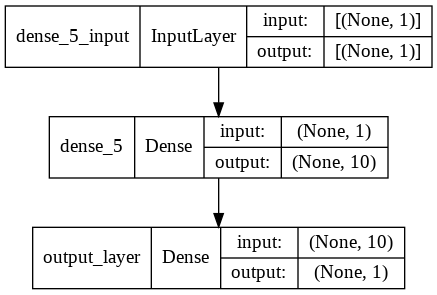

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

###Visualize the model's prediction

In [30]:
#mkae some prediction
y_pred=model.predict(X_Test)
y_pred

array([[42.01952 ],
       [44.72017 ],
       [47.420807],
       [50.121452],
       [52.822094],
       [55.52273 ],
       [58.22338 ],
       [60.92402 ],
       [63.624664],
       [66.32531 ]], dtype=float32)

In [31]:
y_Test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
#lets create a plotting function
def plot_predictions(train_data= X_Train,
                     train_labels= y_Train,
                     test_data=X_Test,
                     test_labels=y_Test,
                     predictions=y_pred):
  
  #plot training data, test data and compare predictions to ground truth labels.
  plt.figure(figsize=(10,7))

  #plot the training data in blue
  plt.scatter(train_data, train_labels, c="b", label=" Training data")

  plt.scatter(test_data, test_labels, c="g", label="Test data")

  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend();

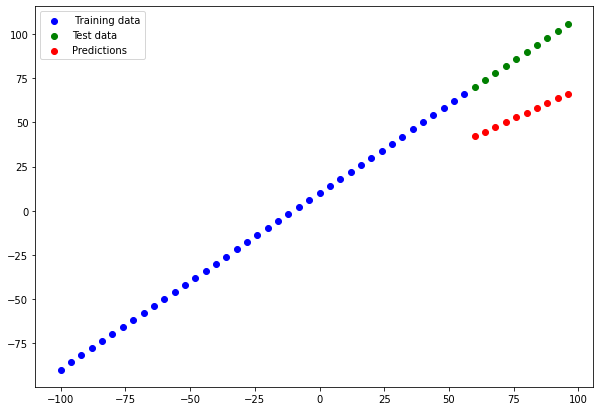

In [33]:
plot_predictions()

###Evaluate the model with evaluation metrics

In [34]:
model.evaluate(X_Test, y_Test)

1/1 [==============================] - 0s 216ms/step - loss: 33.8276 - mae: 33.8276


[33.82758331298828, 33.82758331298828]

In [35]:
#calculate mean absolute error
mae=tf.metrics.mean_absolute_error(y_Test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([45.98048 , 43.27983 , 40.579193, 37.878548, 35.177906, 32.47727 ,
       29.776617, 27.075983, 24.375336, 21.67469 ], dtype=float32)>

In [36]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[42.01952 ],
       [44.72017 ],
       [47.420807],
       [50.121452],
       [52.822094],
       [55.52273 ],
       [58.22338 ],
       [60.92402 ],
       [63.624664],
       [66.32531 ]], dtype=float32)>

In [37]:
y_Test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [38]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([42.01952 , 44.72017 , 47.420807, 50.121452, 52.822094, 55.52273 ,
       58.22338 , 60.92402 , 63.624664, 66.32531 ], dtype=float32)>

In [39]:
#calculate mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_Test, 
                                  y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=33.827583>

In [40]:
#calculate the means squared error
mse=tf.metrics.mean_squared_error(y_true=y_Test, 
                                  y_pred=tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=1158.2341>

In [41]:
y_pred

array([[42.01952 ],
       [44.72017 ],
       [47.420807],
       [50.121452],
       [52.822094],
       [55.52273 ],
       [58.22338 ],
       [60.92402 ],
       [63.624664],
       [66.32531 ]], dtype=float32)

In [42]:
#make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

###running experiment on our model

In [43]:
X_Train, y_Train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

***Build model_1***

In [44]:
#build random seed
tf.random.set_seed(42)

#create the model
model_1=tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 7ms

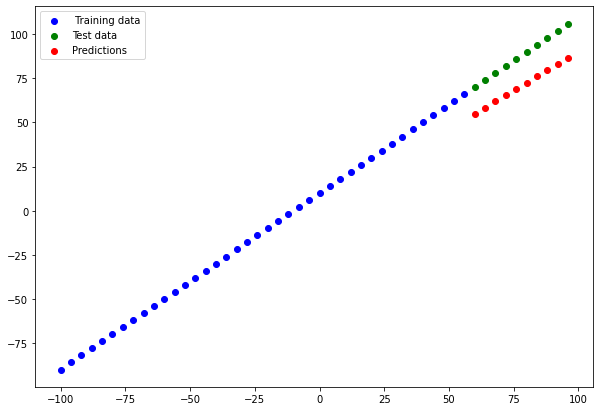

In [45]:
#make and plot predictions for model_1
y_pred_1=model_1.predict(X_Test)
plot_predictions(predictions=y_pred_1)

In [46]:
#calculate model_1 evaluation metrics
mae_1=mae(y_Test, y_pred_1)
mse_1=mse(y_Test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=17.272385>,
 <tf.Tensor: shape=(), dtype=float32, numpy=300.0373>)

***Build model_2***

2 dense layers, trained for 100 epochs

In [47]:
#build random seed
tf.random.set_seed(42)

#create the model
model_2=tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

#compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 40.2867 - mae: 40.2867
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 25.9297 - mae: 25.9297
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 44.1696 - mae: 44.1696
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 11.2212 - mae: 11.2212
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 23.0317 - mae: 23.0317
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 24.2563 - mae: 24.2563
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2416 - mae: 11.2416
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 34.1576 - mae: 34.1576
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 12.5246 - mae: 12.5246
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1823 - mae: 10.1823
Epoch 11/100
2/2 [==============================] - 0s

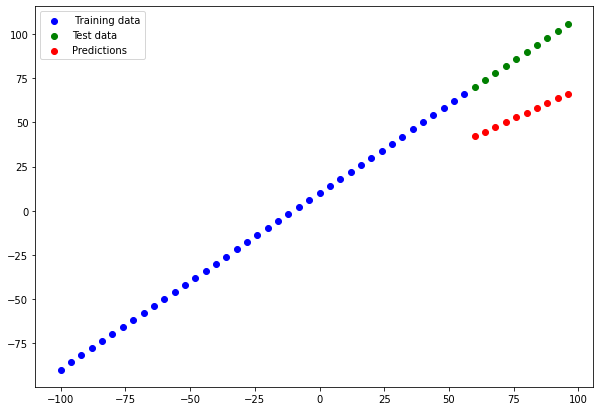

In [48]:
#make and plot predictions for model_2
y_pred_2=model_2.predict(X_Test)
plot_predictions(predictions=y_pred_2)

In [49]:
#calculate model_2 evaluation metrics
mae_2=mae(y_Test, y_pred_2)
mse_2=mse(y_Test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=33.827583>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1158.2341>)

***Build model_3***

2 layer, trained for 500 epochs



In [50]:
#build random seed
tf.random.set_seed(42)

#create the model
model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

#compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 5ms/step - loss: 40.2867 - mae: 40.2867
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 25.9297 - mae: 25.9297
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 44.1696 - mae: 44.1696
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 11.2212 - mae: 11.2212
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 23.0317 - mae: 23.0317
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 24.2563 - mae: 24.2563
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.2416 - mae: 11.2416
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 34.1576 - mae: 34.1576
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 12.5246 - mae: 12.5246
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 10.1823 - mae: 10.1823
Epoch 11/500
2/2 [==============================] - 0s 4ms/

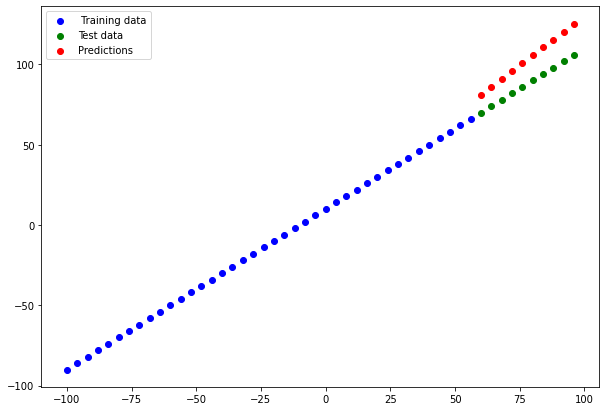

In [51]:
#make and plot predictions for model_2
y_pred_3=model_3.predict(X_Test)
plot_predictions(predictions=y_pred_3)

In [52]:
#calculate model_2 evaluation metrics
mae_3=mae(y_Test, y_pred_3)
mse_3=mse(y_Test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=15.080874>,
 <tf.Tensor: shape=(), dtype=float32, numpy=235.06535>)

###Compare our experiment results

In [53]:
import pandas as pd

model_results= [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]



In [54]:
all_results= pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,17.272385,300.037292
1,model_2,33.827583,1158.234131
2,model_3,15.080874,235.065353


###Saving the model

1. SavedModel format

2. HDF5 format

In [55]:
#save model
model_2.save("best_model_savedmodel_format")

INFO:tensorflow:Assets written to: best_model_savedmodel_format/assets


In [56]:
#save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

##Loading the model from saved model

In [57]:
#load in the savedmodel format
loaded_SavedModel_format=tf.keras.models.load_model("best_model_savedmodel_format")

In [58]:
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [59]:
loaded_h5_model= tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

In [60]:
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


##Download a model from a google colab

1. go to "files" tab and right click on the target file and click download

2. use download coding

3. save in google drive

In [61]:
#download a file from google colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
#save a file into google drive
#!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

In [64]:
#read in the insurance dataset
insurance= pd.read_csv("med-insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [65]:
insurance["sex"], insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [67]:
#one hot encode out dataframe
insurance_onehot=pd.get_dummies(insurance)
insurance_onehot.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [69]:
#create X & y values (features and labels)
X= insurance_onehot.drop("expenses", axis=1) 
y=insurance_onehot["expenses"]

In [70]:
#view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0


In [71]:
#view y
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [76]:
#create training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [85]:
#build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13235.9482 - mae: 13235.9482
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 12311.0908 - mae: 12311.0908
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12173.8408 - mae: 12173.8408
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12099.1953 - mae: 12099.1953
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11985.5869 - mae: 11985.5869
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11799.8379 - mae: 11799.8379
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11476.9746 - mae: 11476.9746
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 10967.5205 - mae: 10967.5205
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10349.5850 - mae: 10349.5850
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9701.641

In [86]:
insurance_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 11, 10)            20        
                                                                 
 dense_24 (Dense)            (None, 11, 1)             11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [87]:
#check the result of insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8926.7412 - mae: 8926.7412


[8926.7412109375, 8926.7412109375]

In [89]:
y_train.median(), y_train.mean()

(9575.439999999999, 13346.089869158872)

###Improve the model

In [97]:
#set random seed
tf.random.set_seed(42)

insurance_model2=tf.keras.Sequential([
                                      tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1),

])

insurance_model2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(lr= 0.01),
                         metrics=["mae"])

insurance_model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)
                         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13109.1064 - mae: 13109.1064
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 12110.5186 - mae: 12110.5186
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 11793.1279 - mae: 11793.1279
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 10924.1523 - mae: 10924.1523
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 9199.4648 - mae: 9199.4648
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 8325.5127 - mae: 8325.5127
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8289.7100 - mae: 8289.7100
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 8295.6904 - mae: 8295.6904
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 8286.0811 - mae: 8286.0811
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 8287.1855 - mae: 8

In [98]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8630.2871 - mae: 8630.2871


[8630.287109375, 8630.287109375]

In [99]:
#set random seed
tf.random.set_seed(42)

insurance_model3=tf.keras.Sequential([
                                      tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1),

])

insurance_model3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(lr= 0.01),
                         metrics=["mae"])

history= insurance_model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=1)
                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13109.1064 - mae: 13109.1064
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 12110.5186 - mae: 12110.5186
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 11793.1279 - mae: 11793.1279
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 10924.1523 - mae: 10924.1523
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 9199.4648 - mae: 9199.4648
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 8325.5127 - mae: 8325.5127
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8289.7100 - mae: 8289.7100
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 8295.6904 - mae: 8295.6904
Epoch 9/200
34/34 [==============================] - 0s 7ms/step - loss: 8286.0811 - mae: 8286.0811
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 8287.1855 - mae: 8

In [100]:
insurance_model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8640.6270 - mae: 8640.6270


[8640.626953125, 8640.626953125]

Text(0.5, 0, 'epochs')

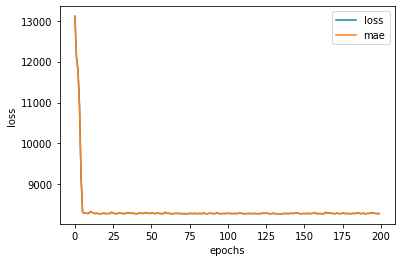

In [102]:
#plot history (also knows as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

###Preprocessing data (normalization and standardization)

In [103]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,1,1,0,0,1,0,0
1334,18,31.9,0,1,0,1,0,1,0,0,0
1335,18,36.9,0,1,0,1,0,0,0,1,0
1336,21,25.8,0,1,0,1,0,0,0,0,1


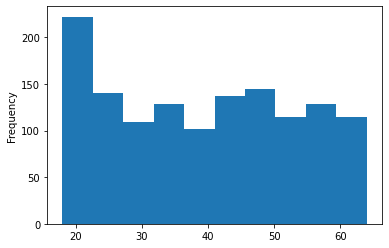

In [104]:
X["age"].plot(kind="hist")

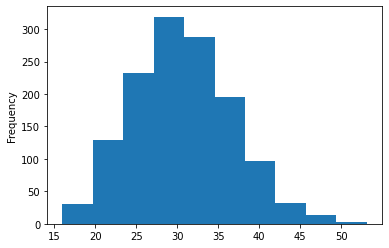

In [105]:
X["bmi"].plot(kind="hist")

In [107]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64